In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brightest_gal = pd.read_csv("brightest_galaxy.csv")
mag_calc = pd.read_csv("magnitude_calculated.csv")
pantheon_catalog = pd.read_csv("data_collection_files/data_files/unmatched_pantheon.csv")

In [3]:
data_dict = []
flags_m = 0
flags_i = 0
prev_key = -1

for i in range(len(brightest_gal)):
    for j in range(len(mag_calc)):

        if brightest_gal['SNID'][i] == mag_calc['SNID'][j]:
            key = brightest_gal['Galaxy_Key'][i]
            if key != prev_key:
                SNID = brightest_gal['SNID'][i]
                RA = brightest_gal['RA_Galaxy'][i]
                Dec = brightest_gal['Dec_Galaxy'][i]
                index = np.where(SNID == pantheon_catalog['SNID'])
                z = pantheon_catalog['zhel'][index[0][0]]

                H0 = 69.6
                distance_mpc = (z * 3*(10**8)) / H0
                d_pc = distance_mpc * 1e3
                app_mag = mag_calc['Zeropoint AB'][j] + brightest_gal['Mag'][i]
                abs_mag = app_mag - 5 * np.log10(d_pc/10)

                i_mag = brightest_gal['Mag'][i]

                flag_mag = False 
                flag_i = False
                flag_total = False

                if (abs_mag > -12):
                    flag_mag = True
                    flags_m += 1

                if (i_mag == 99.0):
                    flag_i = True
                    flags_i += 1
                
                if flag_mag == True | flag_i == True:
                    flag_total = True

                info = {
                    "SNID": SNID,
                    "File_key": brightest_gal['File_key'][i],
                    "Galaxy_key": key,
                    "Galaxy_RA": RA,
                    "Galaxy_Dec": Dec,
                    "Filter": mag_calc['Filter'][j],
                    "Zeropoint": mag_calc['Zeropoint AB'][j],
                    "Instrumental_Mag": i_mag,
                    "Apparent_Magnitude": app_mag,
                    "Absolute_Magnitude": abs_mag,
                    "Flag_mag": flag_mag,
                    "Flag_instrum": flag_i,
                    "Flag_total": flag_total
                    }
                prev_key = brightest_gal['Galaxy_Key'][i]
                data_dict.append(info)
                

In [4]:
output_csv = "corrected_mags.csv"
df = pd.DataFrame(data_dict)
df = df[df['Flag_total']!=True]

In [5]:
df.head()

,SNID,File_key,Galaxy_key,Galaxy_RA,Galaxy_Dec,Filter,Zeropoint,Instrumental_Mag,Apparent_Magnitude,Absolute_Magnitude,Flag_mag,Flag_instrum,Flag_total
0,Eagle,hst_12443_2o_wfc3_ir_f125w_drz,1,189.351122,62.205750,F125W,26.225602,-6.4723,19.753302,-23.460129,False,False,False
1,Eagle,hst_12443_1h_wfc3_ir_f125w_drz,2,189.348815,62.187121,F125W,26.225602,-4.5668,21.658802,-21.554629,False,False,False
2,Eagle,hst_12443_1h_wfc3_ir_f160w_drz,3,189.348810,62.187122,F125W,26.225602,-4.5389,21.686702,-21.526729,False,False,False
5,Eagle,hst_12443_2o_wfc3_ir_f160w_drz,6,189.420313,62.208607,F125W,26.225602,-7.6230,18.602602,-24.610829,False,False,False
6,Eagle,hst_12443_3k_wfc3_ir_f125w_drz,7,189.289543,62.209272,F125W,26.225602,-12.3266,13.899002,-29.314429,False,False,False


In [6]:
df = df.drop(['Galaxy_key','Zeropoint','Flag_mag', 'Flag_instrum', 'Flag_total'], axis=1)

In [7]:
df['SNID'].unique()

array(['Eagle', 'Sasquatch', 'SCP06C0', 'Borg', 'Qiqirn', 'Aphrodite',
       'Manipogo', 'Gabi', 'Greenburg'], dtype=object)

In [ ]:
def angstroms(row):
    if row['Filter'] == 'F125W':
        return 12500
    elif row['Filter'] == 'F160W':
        return 16000
    elif row['Filter'] == 'F105W':
        return 10500

df['Angstroms'] = df.apply(angstroms, axis=1)


,SNID,File_key,Galaxy_RA,Galaxy_Dec,Filter,Instrumental_Mag,Apparent_Magnitude,Absolute_Magnitude,Angstroms
0,Eagle,hst_12443_2o_wfc3_ir_f125w_drz,189.351122,62.205750,F125W,-6.4723,19.753302,-23.460129,12500
1,Eagle,hst_12443_1h_wfc3_ir_f125w_drz,189.348815,62.187121,F125W,-4.5668,21.658802,-21.554629,12500
2,Eagle,hst_12443_1h_wfc3_ir_f160w_drz,189.348810,62.187122,F125W,-4.5389,21.686702,-21.526729,12500
5,Eagle,hst_12443_2o_wfc3_ir_f160w_drz,189.420313,62.208607,F125W,-7.6230,18.602602,-24.610829,12500
6,Eagle,hst_12443_3k_wfc3_ir_f125w_drz,189.289543,62.209272,F125W,-12.3266,13.899002,-29.314429,12500
...,...,...,...,...,...,...,...,...,...
2588,Greenburg,hst_10340_id_acs_wfc_f775w_j92qid_drc,53.049167,-27.859108,F160W,-4.0513,21.888355,-21.568729,16000
2589,Greenburg,ibeve2020_drz,53.126967,-27.800927,F160W,-2.8198,23.119855,-20.337229,16000
2590,Greenburg,j8e691030_drc,53.049230,-27.860206,F160W,2.0945,28.034155,-15.422929,16000
2591,Greenburg,hst_12461_q4_wfc3_ir_f125w_ibwjq4_drz,53.064094,-27.845906,F160W,-8.1751,17.764555,-25.692529,16000


0       False
1       False
2       False
5       False
6       False
        ...  
2588    False
2589    False
2590    False
2591    False
2592    False
Name: Galaxy_RA, Length: 2346, dtype: bool

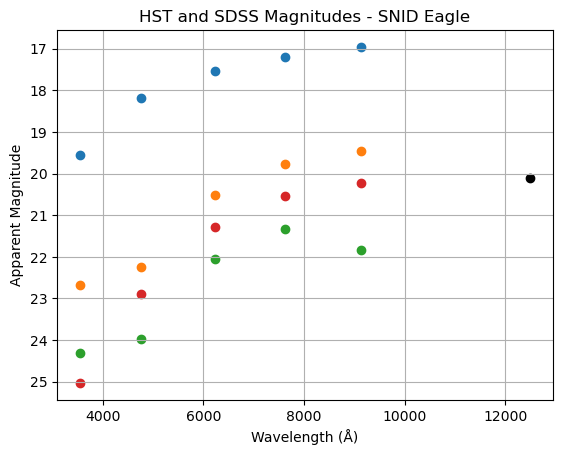

In [9]:
df_Eagle= df[df['SNID'] == 'Eagle']
sdss_eagle = pd.read_csv('SDSS_data/Eagle.csv')
fig, ax = plt.subplots()
ax.scatter(np.average(df_Eagle['Angstroms']), np.average(df_Eagle['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_eagle.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o',label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Eagle")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

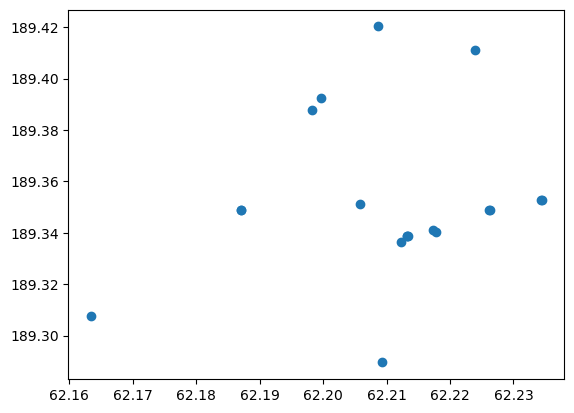

In [10]:
plt.scatter(df_Eagle['Galaxy_Dec'],df_Eagle['Galaxy_RA'])

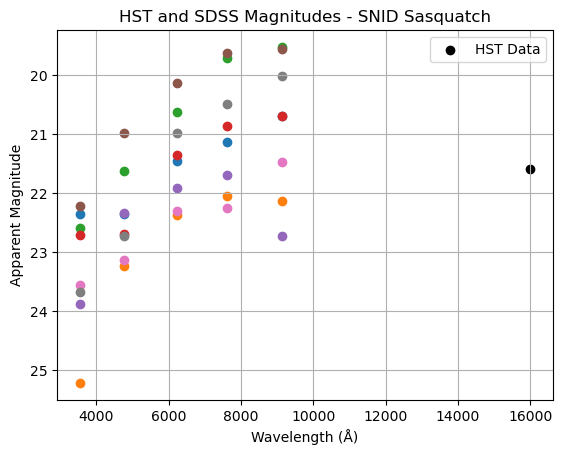

In [11]:
df_Sasquatch= df[df['SNID'] == 'Sasquatch']
sdss_sas = pd.read_csv('SDSS_data/Sasquatch.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Sasquatch['Angstroms'], df_Sasquatch['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Sasquatch['Angstroms']), np.average(df_Sasquatch['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_sas.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Sasquatch")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

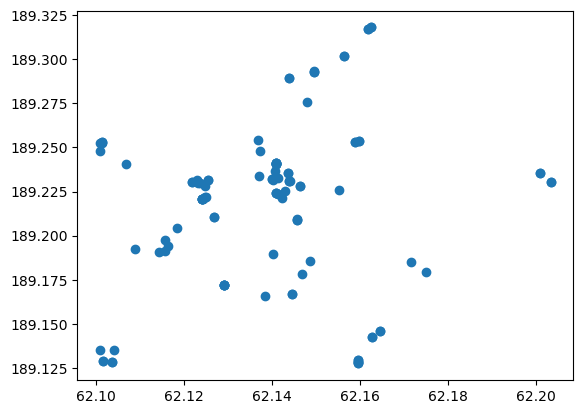

In [12]:
plt.scatter(df_Sasquatch['Galaxy_Dec'],df_Sasquatch['Galaxy_RA'])

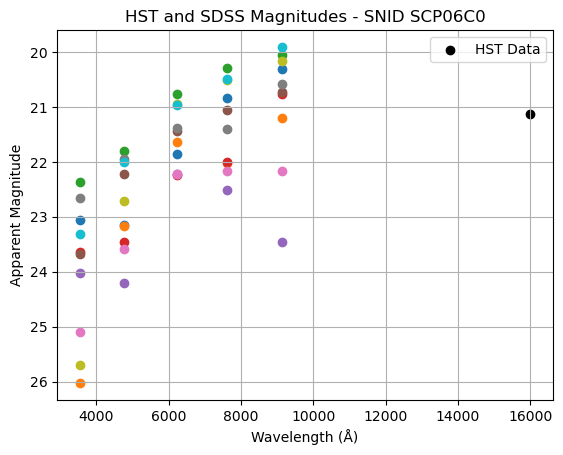

In [13]:
df_SCP06C0 = df[df['SNID'] == 'SCP06C0']
sdss_scp = pd.read_csv('SDSS_data/SCP06C0.csv')
fig, ax = plt.subplots()
#plt.scatter(df_SCP06C0['Angstroms'], df_SCP06C0['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_SCP06C0['Angstroms']), np.average(df_SCP06C0['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_scp.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID SCP06C0")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

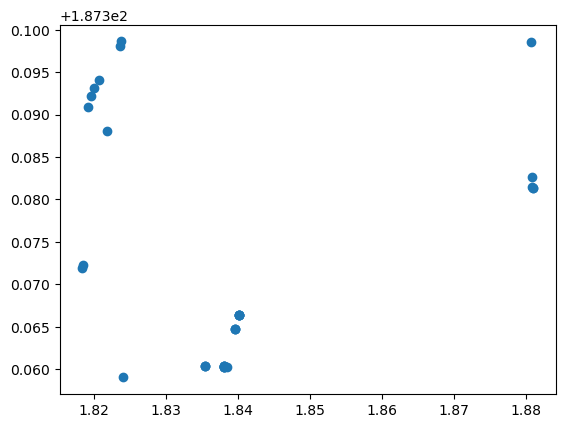

In [14]:
plt.scatter(df_SCP06C0['Galaxy_Dec'],df_SCP06C0['Galaxy_RA'])

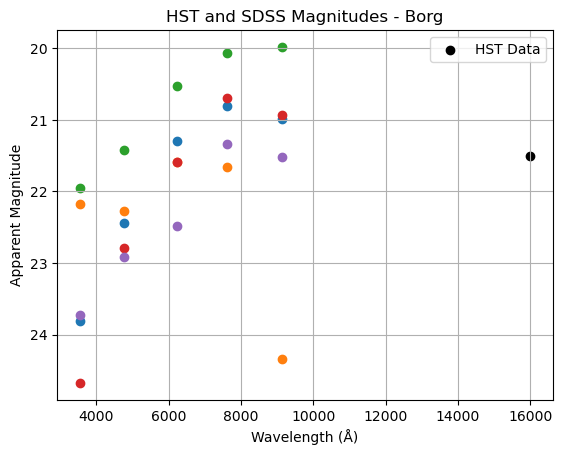

In [15]:
df_Borg = df[df['SNID'] == 'Borg']
sdss_borg = pd.read_csv('SDSS_data/Borg.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Borg['Angstroms'], df_Borg['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Borg['Angstroms']), np.average(df_Borg['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_borg.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - Borg")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

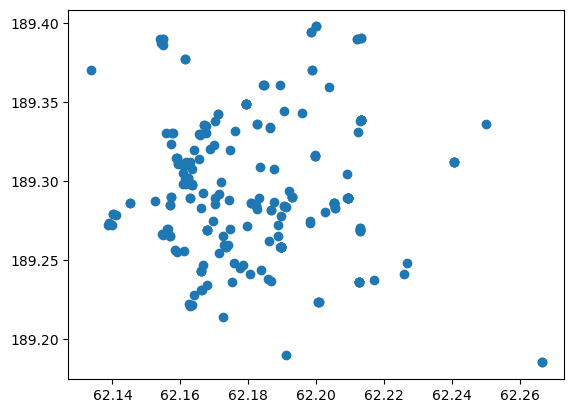

In [16]:
plt.scatter(df_Borg['Galaxy_Dec'],df_Borg['Galaxy_RA'])

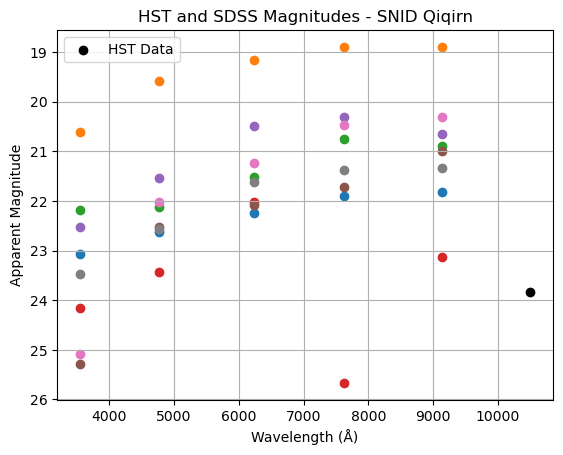

In [25]:
df_Qiqirn = df[df['SNID'] == 'Qiqirn']
sdss_qiqirn = pd.read_csv('SDSS_data/Qiqirn.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Qiqirn['Angstroms'], df_Qiqirn['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Qiqirn['Angstroms']), np.average(df_Qiqirn['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_qiqirn.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Qiqirn")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

In [31]:
df_Qiqirn.drop(df_Qiqirn['Galaxy_RA'] < 10)


KeyError: '[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] not found in axis'

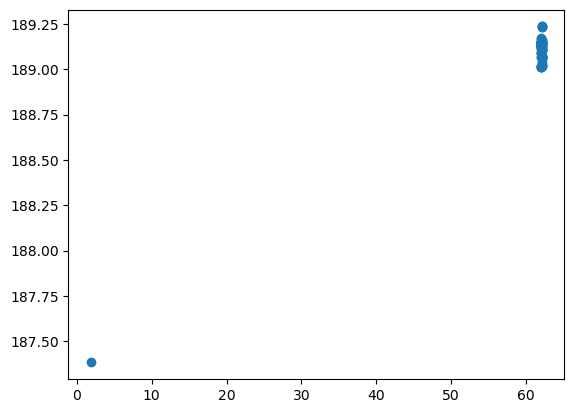

In [18]:
plt.scatter(df_Qiqirn['Galaxy_Dec'],df_Qiqirn['Galaxy_RA'])

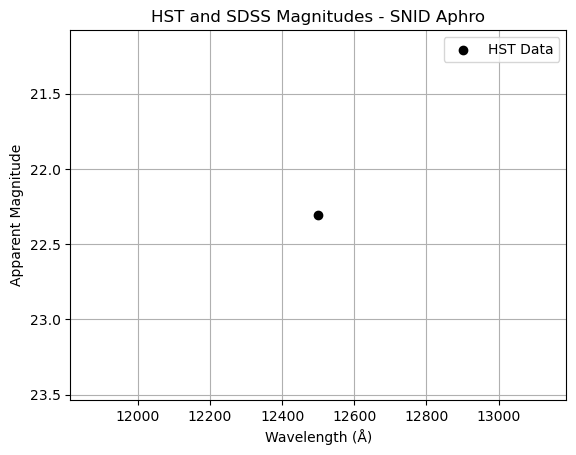

In [ ]:
df_Aphrodite = df[df['SNID'] == 'Aphrodite']
sdss_aphro = pd.read_csv('SDSS_data/Aphrodite.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Aphrodite['Angstroms'], df_Aphrodite['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Aphrodite['Angstroms']), np.average(df_Aphrodite['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_aphro.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Aphro")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

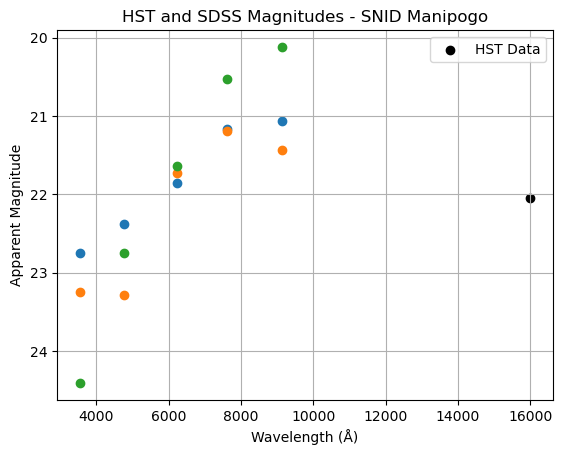

In [20]:
df_Manipogo = df[df['SNID'] == 'Manipogo']
sdss_aphro = pd.read_csv('SDSS_data/Manipogo.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Manipogo['Angstroms'], df_Manipogo['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Manipogo['Angstroms']), np.average(df_Manipogo['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_aphro.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Manipogo")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

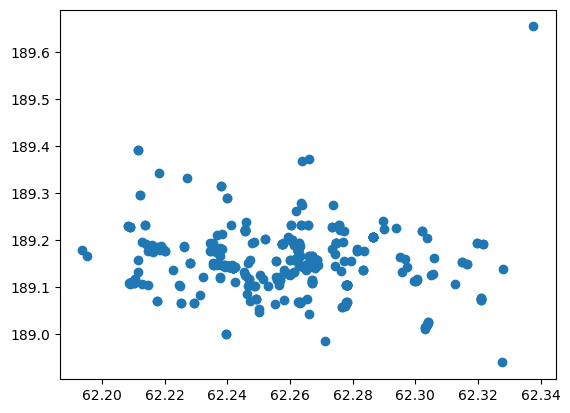

In [21]:
plt.scatter(df_Manipogo['Galaxy_Dec'],df_Manipogo['Galaxy_RA'])

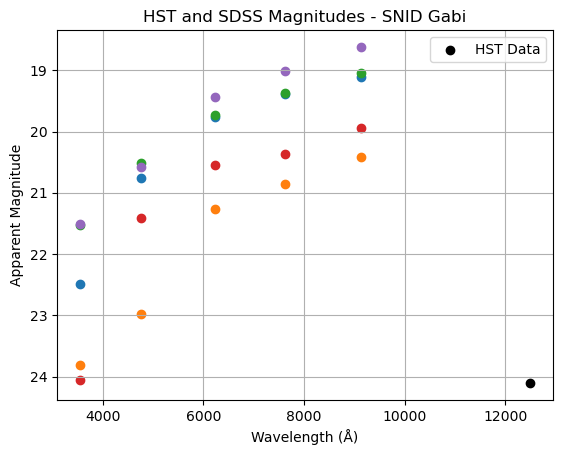

In [22]:
df_Gabi = df[df['SNID'] == 'Gabi']
sdss_Gabi = pd.read_csv('SDSS_data/Gabi.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Gabi['Angstroms'], df_Gabi['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Gabi['Angstroms']), np.average(df_Gabi['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_Gabi.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Gabi")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

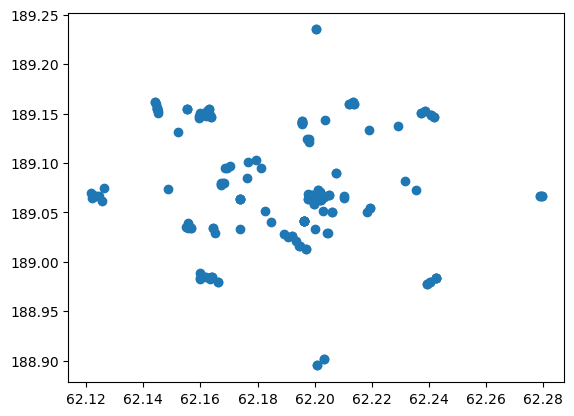

In [23]:
plt.scatter(df_Gabi['Galaxy_Dec'],df_Gabi['Galaxy_RA'])

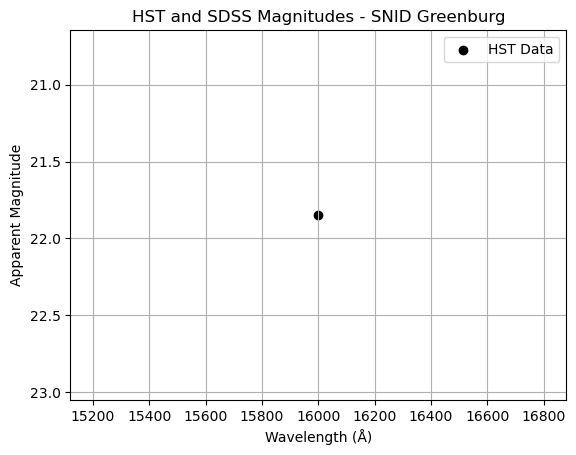

In [24]:
df_Greenburg = df[df['SNID'] == 'Greenburg']
sdss_Greenburg = pd.read_csv('SDSS_data/Greenburg.csv')
fig, ax = plt.subplots()
#plt.scatter(df_Greenburg['Angstroms'], df_Greenburg['Apparent_Magnitude'], color = 'black', label = 'HST Data')
ax.scatter(np.average(df_Greenburg['Angstroms']), np.average(df_Greenburg['Apparent_Magnitude']), color = 'black', label = 'HST Data')
wavelengths = [3542, 4770, 6231, 7625, 9134]

# Plot each row
for index, row in sdss_Greenburg.iterrows():
    magnitudes = row[['u', 'g', 'r', 'i', 'z']]
    plt.scatter(wavelengths, magnitudes, marker='o'
                #,label=f'SDSS obj {index+1}'
                )

plt.xlabel("Wavelength (Å)")
plt.ylabel("Apparent Magnitude")
plt.title("HST and SDSS Magnitudes - SNID Greenburg")
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()